### Author: Masab Umair

### Supervised Machine Learning

### The Sparks Foundation (Task 1)

Problem Statement: Predict the percentage of a student based on the no. of study hours

In [25]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# read csv file from a link
csv_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(csv_url)

In [27]:
# check first 5 rows of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
# check for data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
# Statistical investigation of data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [30]:
# check out number of rows and columns
df.shape

(25, 2)

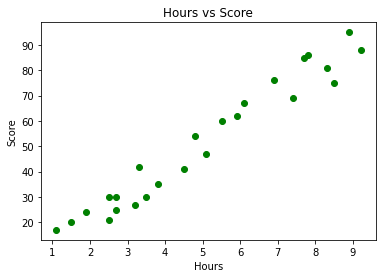

In [31]:
# scatter plot to check for the correlation between target and predictor variable
plt.scatter(x = df['Hours'], y = df['Scores'], c = 'green')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

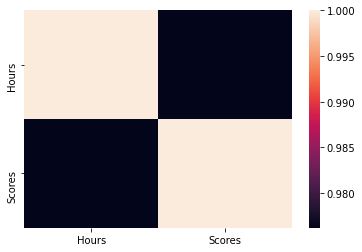

In [32]:
sns.heatmap(df.corr())

In [33]:
# separate target and predictor variables
X = df['Hours']
y = df['Scores']

In [34]:
X

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [35]:
# reshape the predictor variable
X = X.values.reshape(-1,1)

In [36]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [37]:
# import sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
# divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
# instantiate Linear Regression
regressor = LinearRegression()

In [40]:
# train the model 
regressor.fit(X_train, y_train)

LinearRegression()

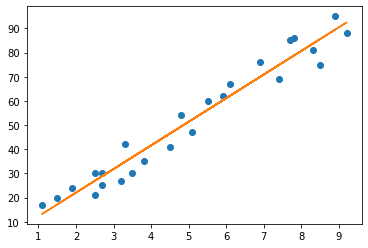

In [41]:
X = df['Hours']
y = df['Scores']
plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b)

In [42]:
# predict using testing data
y_pred = regressor.predict(X_test)

In [43]:
y_pred

array([86.27803579, 34.32111961, 27.4588854 , 50.00622638, 27.4588854 ,
       70.59292902, 21.57697036, 29.41952374])

In [44]:
# make a dataframe of actual and preicted values to compare them side by side
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3,75,86.278036
2,27,34.321120
16,30,27.458885
21,54,50.006226
0,21,27.458885
23,76,70.592929
17,24,21.576970
9,25,29.419524


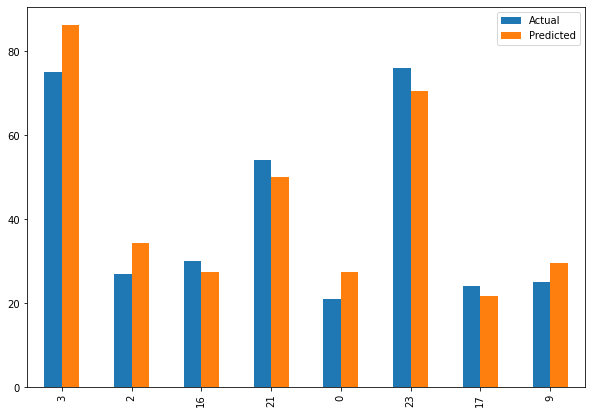

In [45]:
df.plot(kind = 'bar', figsize = (10,7))

In [46]:
# predict on a user defined value
hours = np.array([9.25]).reshape(1, 1)
predicted_score = regressor.predict(hours)

In [47]:
print(predicted_score)

[93.63042959]


In [48]:
# model accuracy
regressor.score(X_test, y_test)

0.921376048639744